In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Распределение Парето

Выборка объема из случайной величины, имеющей распределение Парето (функция плотности $f=\frac{b}{x^{b+1}}$) с $b=10.0$

In [88]:
b = 10.0
pareto_rv = sts.pareto(b)
values = pareto_rv.rvs(size=1000)

Постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Text(0,0.5,u'$f(x)$')

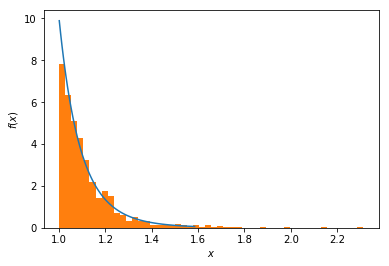

In [89]:
x = np.linspace(sts.pareto.ppf(0.01, b), sts.pareto.ppf(0.99, b), 100)
plt.plot(x, sts.pareto.pdf(x, b))
plt.hist(values, bins=50, normed=True)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. 

In [156]:
# подсчитаем среднее для 1000 выборок размера n для n=5, n=10, n=50 
# и сохраним в sample_means
sample_means = {}
for n in (5, 10, 50):
    means_for_size_n = sample_means.setdefault(n, [])
    for x in range(1000):
        sample = pareto_rv.rvs(size=n)
        means_for_size_n.append(np.mean(sample))

Используя информацию о среднем и дисперсии исходного распределения, посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения.

In [157]:
pareto_Ex = b / (b-1)  # теоретическое среднее для распределения Парето
pareto_Dx = (1/(b-1))**2 * b/(b-2)  # теоретическая дисперсия для распределения Парето
x = np.linspace(0, 2, 100)  # генерим массив из 100 точку

In [162]:
def make_graph(n):
    """
    Функция рисует гистограмму по значениям средних для 1000 выборок объема n,
    посчитанных ранее и хранящихся в sample_means.
    На каждую гистограмму наложен график плотности нормального распределения,
    на основе теоретических средних/дисперсии и выборки размера n.
    """
    norm_rv = sts.norm(loc=Ex, scale=(pareto_Dx/n)**0.5)
    fig=plt.figure(figsize=(12, 6))
    plt.hist(sample_means[n], bins=40, normed=True)
    plt.plot(x, norm_rv.pdf(x))
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.title('$n=%s$' % n)


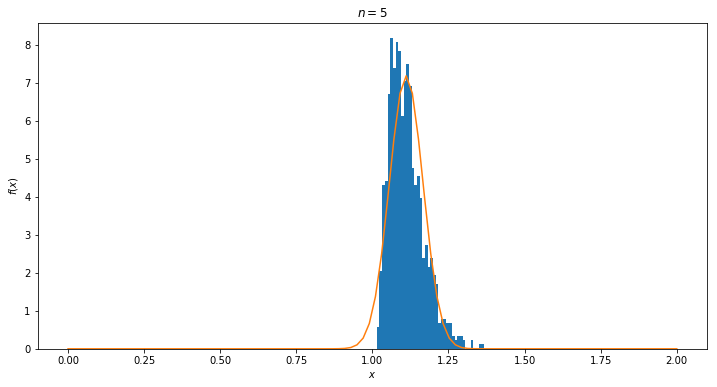

In [163]:
make_graph(n=5)

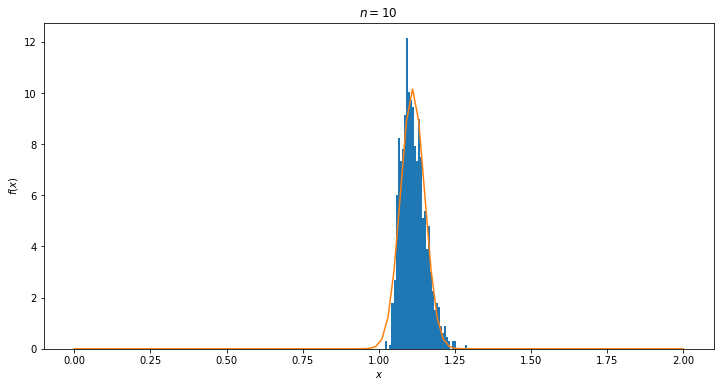

In [164]:
make_graph(n=10)

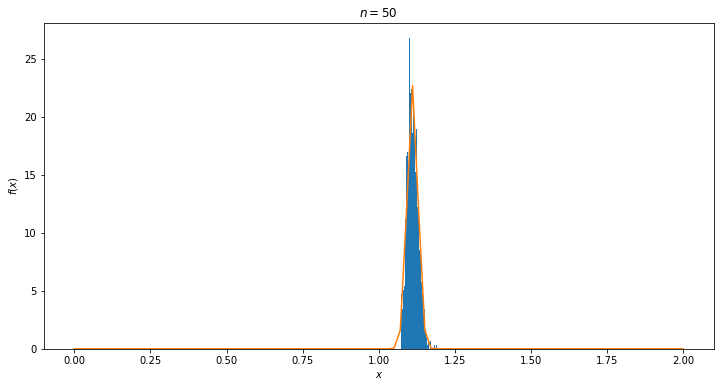

In [165]:
make_graph(n=50)

По графикам видно, что с увеличением объема выборки n распределение выборочных средних становится более гладким и более похожим на нормальное распределение.